# Manipulating Astronomical data with python

In the Github course repository you will find a set of images that has been obserbed last years. 

The object is $SZ\_Lyn$ observed using SVAS Telescope in Basovizza. 

It is a variable star and the aim of this observation is to measure the variability period of the star.


In [1]:
from astropy.io import fits
import numpy as np

In [2]:
hdulist = fits.open("Dati/ima0001.fits")

The open() function has several optional arguments, the default mode, as in the above example, is “readonly”. 

The open function returns an object called an HDUList which is a list-like collection of HDU objects. 

An HDU (__Header Data Unit__) is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table.


In [6]:
hdulist.info()

Filename: Riduzione Dati/DATA/OBJ/ima0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      90   (1108, 834)   int16 (rescales to uint16)   


After the above open call, hdulist[0] is the primary HDU, hdulist[1] is the first extension HDU, etc (if there are any extensions), and so on. 

In this particular case there is only a primary HDU.

## Working with header 

Now we can "import" the header into a python _dictionary_:

In [17]:
header = hdulist[0].header
type(header)

astropy.io.fits.header.Header

To print the whole header (all keys and values) you can use `print(repr(hdr))` or just type the name:

In [18]:
header

SIMPLE  =                    T / Standard FITS format: NOST 100-2.0             
BITPIX  =                   16 / No. of bits per pixel                          
NAXIS   =                    2 / No. of axes in image                           
NAXIS1  =                 1108 / No. of pixels                                  
NAXIS2  =                  834 / No. of pixels                                  
EXTEND  =                    T / FITS extension may be present                  
                                                                                
                                                                                
CRPIX1  =                   1. / Reference pixel                                
CRVAL1  =                   1. / Coordinate at reference pixel                  
CDELT1  =                   1. / Coord. incr. per pixel (original value)        
CTYPE1  = '                '   / Units of coordinate                            
CRPIX2  =                   

To get a list of all keywords, use the `Header.keys()` method just as you would with a dict:

In [24]:
list(header.keys())

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'EXTEND',
 '',
 '',
 'CRPIX1',
 'CRVAL1',
 'CDELT1',
 'CTYPE1',
 'CRPIX2',
 'CRVAL2',
 'CDELT2',
 'CTYPE2',
 'BUNIT',
 'BSCALE',
 'BZERO',
 'DATAMAX',
 'DATAMIN',
 '',
 'ORIGIN',
 'DATE',
 'FILENAME',
 'MIDASFTP',
 '',
 'OBJECT',
 'RA',
 'DEC',
 'DATE-OBS',
 'TM-START',
 'EXPTIME',
 'COMMENT',
 'AIRMASS',
 'TELESCOP',
 'INSTRUME',
 'OBSERVER',
 'HISTORY',
 'HISTORY',
 'EXPOSURE',
 'SET-TEMP',
 'CCD-TEMP',
 'XPIXSZ',
 'YPIXSZ',
 'XBINNING',
 'YBINNING',
 'XORGSUBF',
 'YORGSUBF',
 'READOUTM',
 'FILTER',
 'IMAGETYP',
 'FOCUSPOS',
 'FOCUSSSZ',
 'FOCUSTEM',
 'OBJCTRA',
 'OBJCTDEC',
 'OBJCTALT',
 'OBJCTAZ',
 'OBJCTHA',
 'PIERSIDE',
 'SITELAT',
 'SITELONG',
 'JD',
 'JD-HELIO',
 'FOCALLEN',
 'APTDIA',
 'APTAREA',
 'SWCREATE',
 'NOTES',
 'OBJ_TYPE',
 'FLIPSTAT',
 'SWOWNER',
 'INPUTFMT',
 'SWMODIFY',
 'CSTRETCH',
 'CBLACK',
 'CWHITE',
 'PEDESTAL',
 'NEWOBS',
 '',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTORY',
 'HISTO

In [14]:
header['HISTORY']

Edit Flip
Edit Mirror
 ESO-DESCRIPTORS START   ................
 'LHCUTS','R*4',1,4,'5E14.7'
  1.6183013E+03 1.9600503E+03 1.5250000E+03 4.4573000E+04

 'DISPLAY_DATA','I*4',1,9,'7I10'
          2         2       555       418         0        -1        -1
         -1        -1

 ESO-DESCRIPTORS END     ................

In [19]:
header['DATE']

'2015-04-09T18:24:40'

Each keyword have a value and may  have an associated comment

In [20]:
header.comments['DATE']

'[UTC] Date of writing'

Like a dict, one may also use the above syntax to add a new keyword/value pair (and optionally a comment as well). In this case the new card is appended to the end of the header (unless it’s a commentary keyword such as COMMENT or HISTORY, in which case it is appended after the last card with that keyword).

Another way to either update an existing card or append a new one is to use the `Header.set()` method:

In [21]:
header.set("newobs","Taffoni")

In [23]:
header['newobs']

'Taffoni'

## Working with data

A FITS file contains data of different kind: images or Table data.

### Images

If an HDU’s data is an image, the data attribute of the HDU object will return a numpy ndarray object. Refer to the numpy documentation and on Lecture02 for details on manipulating these numerical arrays:

In [38]:
data = hdulist[0].data
type(data)

numpy.ndarray

The image has a dimension that must be the same as described in the Header (NAXIS1, NAXIS2). 

In [39]:
data.shape

(834, 1108)

In [41]:
print ("%s %s" %(header['NAXIS1'],header['NAXIS2']))

1108 834


Images data is a pixel intensity and it is an integer. 

In [42]:
data.dtype.name

'uint16'

Since image data is a numpy object, we can slice it, view it, and perform mathematical operations on it.

In [43]:
data[100,35]

1889

In [44]:
data[30:40, 10:20]

array([[1980, 1915, 1959, 1969, 1853, 1904, 2071, 1945, 1844, 1877],
       [2057, 1971, 1978, 1978, 1987, 1849, 1998, 1881, 1989, 1938],
       [1946, 1981, 2066, 1908, 1943, 1885, 1909, 2015, 1849, 1918],
       [1971, 1912, 2041, 1953, 2113, 2036, 1940, 1958, 2002, 2109],
       [1997, 1992, 2025, 1934, 1993, 2066, 1964, 1903, 1955, 1989],
       [1919, 1973, 1952, 1983, 1956, 2022, 1916, 1894, 1969, 1945],
       [1969, 2053, 1941, 2023, 1870, 1899, 1973, 1986, 1928, 1875],
       [1933, 1858, 1968, 1984, 2019, 1920, 1924, 1934, 1901, 1974],
       [1880, 2020, 2035, 2006, 2038, 1988, 1916, 1948, 1982, 1996],
       [1975, 2017, 1974, 1866, 2026, 1885, 1992, 1911, 1888, 1961]], dtype=uint16)

As any numpy array you can apply different functions (see Lecture 2)

In [45]:
data.max() #max value

44573

Or also the pixels corresponding to  the maximum value

In [49]:
maximum_indices = np.where(data==data.max())

In [55]:
maximum_indices

(array([490]), array([148]))

In this case just one pixel with coordinates (490,148)

### Plot FITS images

As any array we can use matplotlib to plot the image.

In [58]:
import matplotlib.pyplot as plt

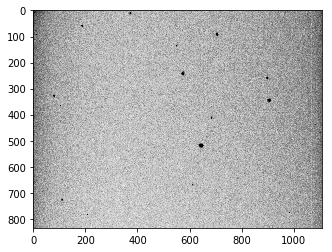

In [62]:
plt.imshow(data, cmap='Greys', vmax=2200,vmin=1500)

### Table data

In [3]:
hdulist = fits.open("Dati/ESTM1.1.01-10.02.2017-0002.fits")

In [4]:
hdulist.info()

Filename: Dati/ESTM1.1.01-10.02.2017-0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   ()      
  1                1 BinTableHDU     14   2592R x 3C   [E, E, E]   


Here you can see a binary table as HDU 1

In [5]:
header = hdulist[0].header
print(repr(header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
N       =                   54 / number of latitude zones                       
NS      =                   48 / number of time steps per orbit                 
NAME    = 'EARTHGEO '          / planet name                                    
MSTAR   =           1.9891E+30 / solar masses                                   
LUMSTAR =        3.8247196E+26 / luminosity in solar units                      
SMA     =           0.89999998 / semi-major axis [AU]                           
ECC     =                  0.0 / eccentricity                                   
OMEGAPER=         -77.06300354 / argument of pericenter                         
GRAV    =           9.800000

In [6]:
data = hdulist[1].data

We can inspect the first element

In [7]:
print(data[0])

(0.02083333, -88.333336, 284.32898)


They are real numbers. 

Each row in the table is a __FITS_record__ object which looks like a (Python) _tuple_ containing elements of heterogeneous data types. They may be:  integer, string, floating point number,  a Boolean value etc.

So the table data are just an array of such records. 

To get the first column or “field”  of the table, use:


In [8]:
data.field(0)

array([ 0.02083333,  0.02083333,  0.02083333, ...,  1.        ,
        1.        ,  1.        ], dtype=float32)

 A column can be referred either by index, as above, or by name but I need to find it.

In [10]:
cols = hdulist[1].columns

In [11]:
cols.info()

name:
    ['year', 'lat', 'temp']
format:
    ['E', 'E', 'E']
unit:
    ['', '', '']
null:
    ['', '', '']
bscale:
    ['', '', '']
bzero:
    ['', '', '']
disp:
    ['', '', '']
start:
    ['', '', '']
dim:
    ['', '', '']
coord_type:
    ['', '', '']
coord_unit:
    ['', '', '']
coord_ref_point:
    ['', '', '']
coord_ref_value:
    ['', '', '']
coord_inc:
    ['', '', '']
time_ref_pos:
    ['', '', '']


So now we know that the first column is a year, the second is a latitude, the third is a temperature

In [13]:
data.field('year')

array([ 0.02083333,  0.02083333,  0.02083333, ...,  1.        ,
        1.        ,  1.        ], dtype=float32)

or also

In [14]:
data['year']

array([ 0.02083333,  0.02083333,  0.02083333, ...,  1.        ,
        1.        ,  1.        ], dtype=float32)

Once we have the `cols` object, we can get different informations directly

In [15]:
cols.names

['year', 'lat', 'temp']

Since each field is a Numpy object, we’ll have the entire arsenal of Numpy tools to use, but also SciPy if we need:

In [17]:
data.field('temp').mean() # mean temperature avereged in time

298.04715

## Save modifications or create new a FITS

As mentioned earlier, after a user opened a file, made a few changes to either header or data, the user can use `HDUList.writeto()` to save the changes. This takes the version of headers and data in memory and writes them to a new FITS file on disk. Subsequent operations can be performed to the data in memory and written out to yet another different file, all without recopying the original data to (more) memory:

In [18]:
hdulist.writeto('newtable.fits')

### Create a new file

Assume that we have some data that we want to save in FITS format. It can be either an Image (collection of Pixels from CCD) or a Table.

Here we consider the two cases.

**Image data**

We start from a bidimentional NumPy array 

In [19]:
image = np.random.rand(1024,768)

We create the primary HDU

In [20]:
hdu0 = fits.PrimaryHDU(image)

We then create a HDUList to contain the newly created primary HDU:

In [22]:
hdul = fits.HDUList([hdu0])

In [23]:
hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (768, 1024)   float64   


In [24]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  768                                                  
NAXIS2  =                 1024                                                  
EXTEND  =                    T                                                  

we can add some more keyword to the header

In [25]:
hdul[0].header['OBSERVER'] = 'Giuliano Taffoni'

maybe also some comments

In [27]:
hdul[0].header['COMMENT'] = "This is my test FITS file"

In [33]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  768                                                  
NAXIS2  =                 1024                                                  
EXTEND  =                    T                                                  
OBSERVER= 'Giuliano Taffoni'                                                    
COMMENT This is my test FITS file                                               

Now it is ready to be saved.

**Tabular Data**

To create a table HDU is a little more involved than image HDU, because a table’s structure needs more information as you have seen before.

We can start from structuring our data: what kind of data do we have? What is their name and units?

Suppose we have two columns, one is the time in terms of expansion factor and one is the temperature in Celsius.

In [34]:
c1 = np.array([0.1, 0.2, 0.3])
c2 = np.array([11.1, 12.3, 15.2])

Now we create the columns

In [36]:
col1 = fits.Column(name='Time', format='E', unit='redshift', array=c1)
col2 = fits.Column(name='Temperature', format='E', unit='celsius', array=c2)

Next, create a column definitions object for all columns:

In [37]:
cols = fits.ColDefs([col1, col2])

Now, create a new binary table HDU object by using the `BinTableHDU.from_columns()` function:

In [38]:
hdu = fits.BinTableHDU.from_columns(cols)

And the HDU to write into a  file is ready

In [40]:
fits.HDUList([hdu]).info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0                1 BinTableHDU     14   3R x 2C   ['E', 'E']   


In [41]:
cols.info()

name:
    ['Time', 'Temperature']
format:
    ['E', 'E']
unit:
    ['redshift', 'celsius']
null:
    ['', '']
bscale:
    ['', '']
bzero:
    ['', '']
disp:
    ['', '']
start:
    ['', '']
dim:
    ['', '']
coord_type:
    ['', '']
coord_unit:
    ['', '']
coord_ref_point:
    ['', '']
coord_ref_value:
    ['', '']
coord_inc:
    ['', '']
time_ref_pos:
    ['', '']
